In [ ]:
# //*[@id="main-container"]/div[2]/div[2]

In [48]:
import os
import json
import time
import tempfile
import requests
import pandas as pd
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import NoSuchElementException, TimeoutException
from IPython.display import Image, display
from datetime import datetime


In [55]:
class interest:
    def __init__(self):
        self.driver = self._create_driver()
        self.results = []

    def _create_driver(self):
        options = Options()
        options.add_argument('--headless')
        options.add_argument('--no-sandbox')
        options.add_argument(
            "user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36"
        )
        options.add_argument('--disable-dev-shm-usage')
        options.add_argument(f'--user-data-dir={tempfile.mkdtemp()}')
        driver = webdriver.Chrome(options=options)
        return driver

    def show_screenshot(self, filename='screenshot.png'):
        # 파일로 저장
        self.driver.save_screenshot(filename)
        
        # 노트북에서 바로 표시
        display(Image(filename=filename, width=500))

    
    def open_page(self, url):
        self.driver.maximize_window()
        
        self.driver.get(url)
    
    def scroll_page(self, scroll_count=1):
        last_height = self.driver.execute_script("return document.body.scrollHeight")
        try:
            for _ in range(scroll_count):
                self.driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
                time.sleep(2)
                new_height = self.driver.execute_script("return document.body.scrollHeight")
                self.show_screenshot()
                if new_height == last_height:
                    print(f'{_}이때 완료 입니다.')
                    break
                last_height = new_height
        except:
            self.close()
    
    def print_parsed_products(self):
        # 기준금리 테이블 행들 가져오기
        rows = self.driver.find_elements(By.XPATH, '//table[contains(@class, "fixed")]/tbody/tr')
        
        print(f"행 개수: {len(rows)}")

        for i, row in enumerate(rows, start=1):
            try:
                cols = row.find_elements(By.TAG_NAME, 'td')
                if len(cols) >= 3:
                    year = cols[0].text.strip()
                    date = cols[1].text.strip()
                    rate = cols[2].text.strip()

                    print(f"{i}번째: 연도={year}, 날짜={date}, 금리={rate}")
                    date_str = f'{year}년 {date}'  # '2025년 02월 25일'
                    date_obj = datetime.strptime(date_str, '%Y년 %m월 %d일')
                else:
                    print(f"{i}번째: 컬럼 부족 (데이터 누락)")
                self.results.append({
                '변경일자': date_obj,
                '기준금리': float(rate)
                })
            except Exception as e:
                print(f"{i}번째: 오류 발생 - {e}")
        df = pd.DataFrame(self.results)
        self.interest_df = df.copy()
        return df

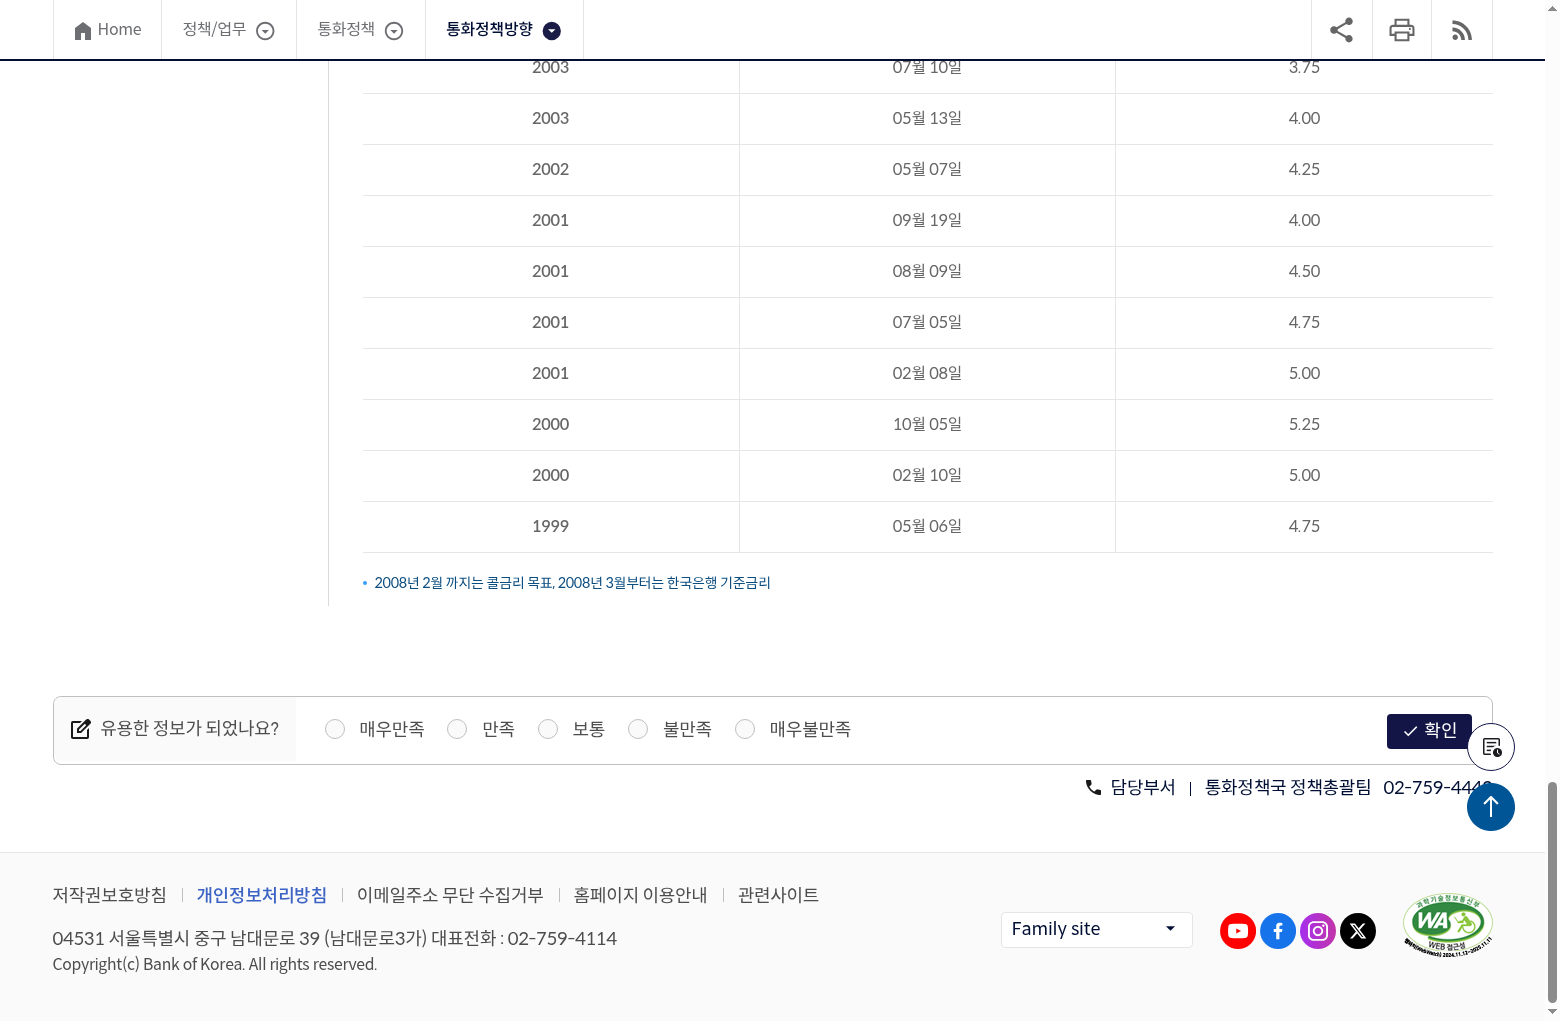

행 개수: 58
1번째: 연도=2025, 날짜=02월 25일, 금리=2.75
2번째: 연도=2024, 날짜=11월 28일, 금리=3.00
3번째: 연도=2024, 날짜=10월 11일, 금리=3.25
4번째: 연도=2023, 날짜=01월 13일, 금리=3.50
5번째: 연도=2022, 날짜=11월 24일, 금리=3.25
6번째: 연도=2022, 날짜=10월 12일, 금리=3.00
7번째: 연도=2022, 날짜=08월 25일, 금리=2.50
8번째: 연도=2022, 날짜=07월 13일, 금리=2.25
9번째: 연도=2022, 날짜=05월 26일, 금리=1.75
10번째: 연도=2022, 날짜=04월 14일, 금리=1.50
11번째: 연도=2022, 날짜=01월 14일, 금리=1.25
12번째: 연도=2021, 날짜=11월 25일, 금리=1.00
13번째: 연도=2021, 날짜=08월 26일, 금리=0.75
14번째: 연도=2020, 날짜=05월 28일, 금리=0.50
15번째: 연도=2020, 날짜=03월 17일, 금리=0.75
16번째: 연도=2019, 날짜=10월 16일, 금리=1.25
17번째: 연도=2019, 날짜=07월 18일, 금리=1.50
18번째: 연도=2018, 날짜=11월 30일, 금리=1.75
19번째: 연도=2017, 날짜=11월 30일, 금리=1.50
20번째: 연도=2016, 날짜=06월 09일, 금리=1.25
21번째: 연도=2015, 날짜=06월 11일, 금리=1.50
22번째: 연도=2015, 날짜=03월 12일, 금리=1.75
23번째: 연도=2014, 날짜=10월 15일, 금리=2.00
24번째: 연도=2014, 날짜=08월 14일, 금리=2.25
25번째: 연도=2013, 날짜=05월 09일, 금리=2.50
26번째: 연도=2012, 날짜=10월 11일, 금리=2.75
27번째: 연도=2012, 날짜=07월 12일, 금리=3.00
28번째: 연도=2011, 날짜=06월 10일, 금리=3.25
29번째: 연도=2011, 날짜=03

In [50]:
crawler = interest()
crawler.open_page('https://www.bok.or.kr/portal/singl/baseRate/list.do?dataSeCd=01&menuNo=200643')
crawler.scroll_page()
df =crawler.print_parsed_products()


In [51]:
df.head(5)

,변경일자,기준금리
0,2025-02-25,2.75
1,2024-11-28,3.00
2,2024-10-11,3.25
3,2023-01-13,3.50
4,2022-11-24,3.25


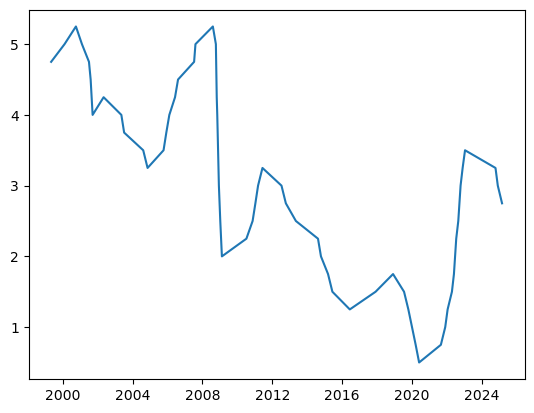

In [54]:
import matplotlib.pyplot as plt
plt.plot(df['변경일자'], df['기준금리'])
plt.show()